# We are going to use 'Boston Housing Data' which comes with sklearn for applying Linear Regression

our target is to predict what are the price of the house in Boston City

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = load_boston() ### created an object for boston data set return Dictionary-like object

In [3]:
boston.keys() ### checked the keys of the bunch

dict_keys(['feature_names', 'data', 'DESCR', 'target'])

Now check the Description of the dataset using below method

In [4]:
print(boston['DESCR']) ### printing out the description of the dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now load the data into the dataframe firstly check the type of 'data' key

In [5]:
##dict_keys(['target', 'feature_names', 'data', 'DESCR'])
df = pd.DataFrame(boston['data'])

Now look above we didn't get our headers we have to set the header column in dataframe

In [6]:
##dict_keys(['target', 'feature_names', 'data', 'DESCR'])
df.columns = boston['feature_names'] ### using columns attribute we can assign our feature_names

In [7]:
 ## this will our MEDV column which is basically our home price
df['Price'] = boston['target'] 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
%matplotlib inline

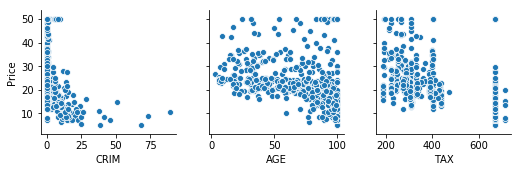

In [11]:
sns.pairplot(df,x_vars=['CRIM','AGE','TAX'],y_vars='Price')### some pre comparsion between featuresb

In [12]:
X = df[boston['feature_names']]
X.shape

In [14]:
y = df['Price']
y.shape

(506, 13)

In [16]:
from sklearn.model_selection import train_test_split## import train test split from model selection module
### took 80 % data as training data and 20 % as testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47) 

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [20]:
linreg.fit(X_train,y_train) ### model fitting is done for creating intercepts and coefficients

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

y = B0 + B1 * CRIM + B2 * ZN + B3 * INDUS + B4 * CHAS + B5 * NOX + B6 *RM + B7 *AGE + B8 *DIS + B9 * RAD + B10 *TAX + B11 * PTRATIO + B12 * B + B13 *LSTAT

In [26]:
linreg.intercept_ ### intercept value B0

32.81383811883808

In [27]:
linreg.coef_ ## vlaue of other Bn which are coefficients

array([-1.13136208e-01,  4.46755073e-02,  2.53405680e-02,  3.09663692e+00,
       -1.81483764e+01,  4.36122404e+00, -6.55727439e-03, -1.50635450e+00,
        2.89167042e-01, -1.27578194e-02, -9.63525251e-01,  1.02756903e-02,
       -4.42850443e-01])

In [25]:
coeff_df = pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.113136
ZN,0.044676
INDUS,0.025341
CHAS,3.096637
NOX,-18.148376
RM,4.361224
AGE,-0.006557
DIS,-1.506355
RAD,0.289167
TAX,-0.012758


In [21]:
predictions = linreg.predict(X_test)## predicted on testing data

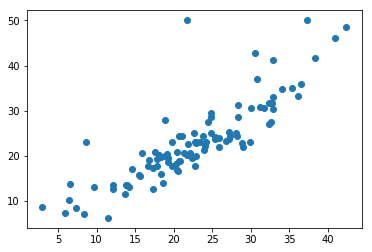

In [22]:
plt.scatter(predictions,y_test) ## checked the graph between predicted values and actual values